In [232]:
import numpy as np
import pandas as pd

In [233]:
df = pd.read_csv('spam.csv')

In [234]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3605,ham,"That means you got an A in epi, she.s fine. Sh...",NaN,NaN,NaN
5213,ham,3 pa but not selected.,NaN,NaN,NaN
334,spam,Valentines Day Special! Win over å£1000 in our...,NaN,NaN,NaN
4132,spam,FreeMsg Today's the day if you are ready! I'm ...,NaN,NaN,NaN
2568,ham,Hey. For me there is no leave on friday. Wait ...,NaN,NaN,NaN


In [235]:
df.shape

(5572, 5)

In [236]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [238]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True) 
# since permanent operation inplace=true

In [239]:
df.sample(5)

,v1,v2
2970,ham,Height of Confidence: All the Aeronautics prof...
2353,spam,Please CALL 08712402902 immediately as there i...
5311,ham,K.k:)i'm going to tirunelvali this week to see...
4977,ham,JADE ITS PAUL. Y DIDNåÕT U TXT ME? DO U REMEMB...
2211,ham,Just gettin a bit arty with my collages at the...


In [240]:
# renaming col names
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
418,ham,"Alright, I'll head out in a few minutes, text ..."
3240,ham,Ok i've sent u da latest version of da project.
5165,ham,ÌÏ still got lessons? ÌÏ in sch?
5102,spam,This msg is for your mobile content order It h...
4488,ham,The new deus ex game comin early next yr


In [241]:
# labling spam/ham 1 for spam 0 for ham
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [242]:
df['target'] = encoder.fit_transform(df['target'])

In [243]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [244]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [245]:
# duplicate values
df.duplicated().sum()

np.int64(403)

In [246]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [247]:
df.duplicated().sum()

np.int64(0)

In [248]:
df.shape

(5169, 2)

## 2. EDA

In [249]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [250]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

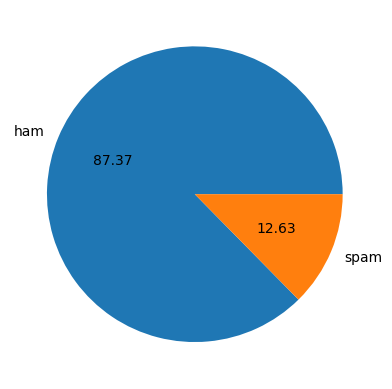

In [251]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [252]:
# Data is impbalanced

In [253]:
import nltk

In [254]:
!pip install nltk


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [255]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [256]:
df['num_characters'] = df['text'].apply(len)

In [257]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [258]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [259]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [260]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.978332,18.455794,1.965564
std,58.236795,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [261]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

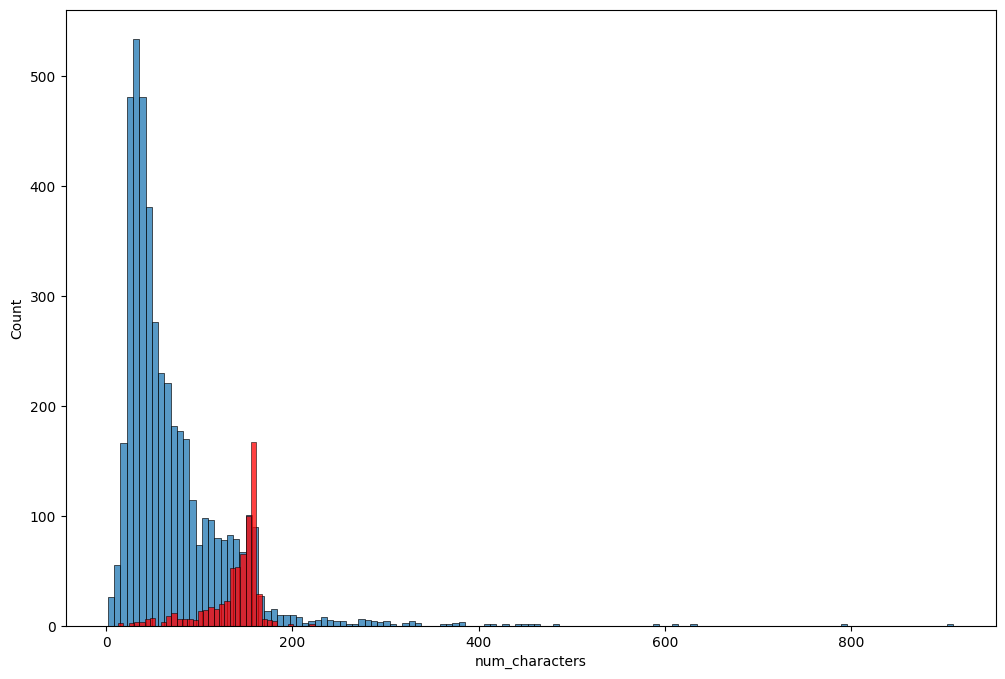

In [262]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

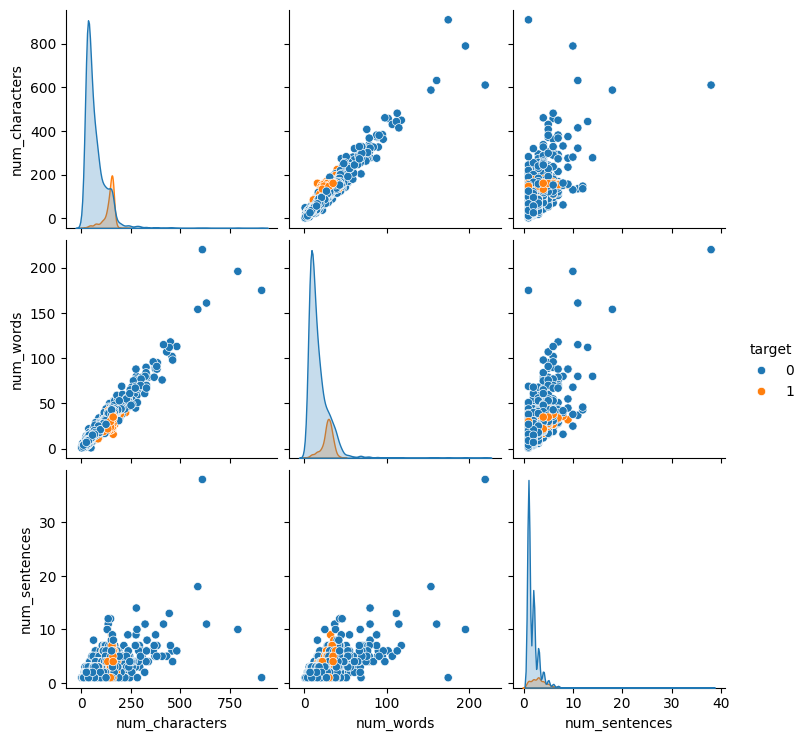

In [263]:
sns.pairplot(df,hue='target')

# 3. Data Preprocessing
1. Lower case
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuation
5. Stemming


In [264]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [265]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [266]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [267]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [268]:
df['transformed_text'] = df['text'].apply(transform_text)

In [269]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [270]:
!pip install wordcloud



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [271]:
# word cloud model for important words for spam and ham
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [272]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" ")) 

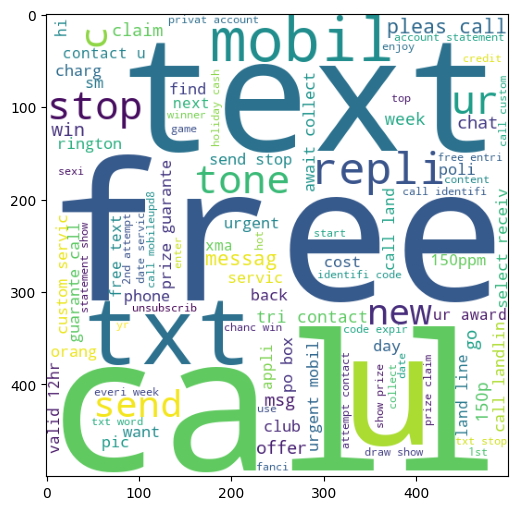

In [273]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [274]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" ")) 

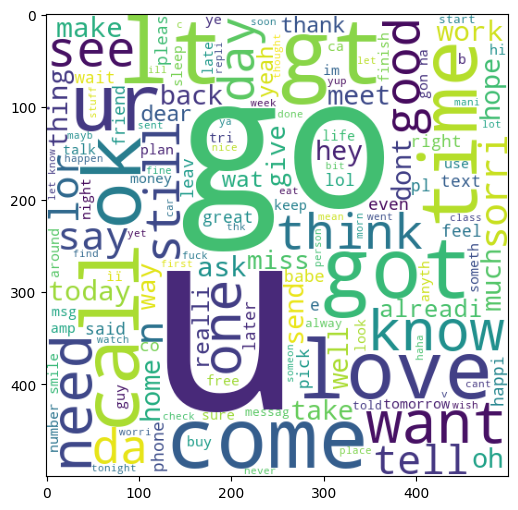

In [275]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [276]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [277]:
len(spam_corpus)

9939

In [278]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [279]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [280]:
len(ham_corpus)

35404

# 4. Model Building

In [281]:
# # BOW another approach TFIDF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [282]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [283]:
x.shape

(5169, 3000)

In [284]:
y = df['target'].values

In [285]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [286]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [287]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2) 

In [288]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [289]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [290]:
# gnb.fit(x_train, y_train)
# y_pred1 = gnb.predict(x_test)
# print(accuracy_score(y_test,y_pred1))
# print(confusion_matrix(y_test,y_pred1))
# print(precision_score(y_test,y_pred1))

In [291]:
# # since mnb gives better precision score will use it
# # we have used tfidf with mnb
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [292]:
# bnb.fit(x_train, y_train)
# y_pred3 = bnb.predict(x_test)
# print(accuracy_score(y_test,y_pred3))
# print(confusion_matrix(y_test,y_pred3))
# print(precision_score(y_test,y_pred3))

In [293]:
# # user input
input_message = input("Enter your message: ")
clean_message = transform_text(input_message)
transformed_message = tfidf.transform([clean_message])
pred = mnb.predict(transformed_message)[0]
if pred == 1:
    print("SPAM")
else:
    print("HAM")

Enter your message:  free free free bonus


SPAM
